Custom linear model
==================

Input values for mock data:  OrderedDict([('const', -0.5), ('slope', 1.1)])

Optimization terminated successfully.
         Current function value: 18.343126
         Iterations: 34
         Function evaluations: 67
-------------------- Parameter summary ---------------------
    const =    -0.314227, free: T, restricted: F, related: F
    slope =      1.06682, free: T, restricted: F, related: F
------------------------------------------------------------


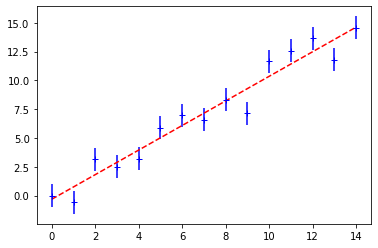

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import funcFit2 as fuf2
import scipy.optimize as sco

np.random.seed(1234)

class LinMod(fuf2.MBOEv):
    """ Linear model """

    def __init__(self):
        # 'pars' specifies parameter names in the model
        fuf2.MBOEv.__init__(self, pars=["const", "slope"], rootName="LinMod")

    def evaluate(self, x, *args):
        """
        Evaluate model at 'x' here and return y = const + x*slope
        
        args receives the remianing arguments specified in the call to fmin but
        not needed here
        """
        return self["const"] + x * self["slope"]


# Instantiate model
lm = LinMod()

lm["slope"] = 1.1
lm["const"] = -0.5

# Get some 'data' and add Gaussian noise with STD 10
x = np.arange(15.)
y = lm.evaluate(x) + np.random.normal(0,1,len(x))
yerr = np.ones_like(x)

print("Input values for mock data: ", lm.parameters())
print()

lm.thaw(["slope", "const"])

# Because ln inherited from MBOEv, it has a default chi-square objective function
fr = sco.fmin(lm.chisqr, x0=lm.freeParamVals(), args=(x,y,yerr))
lm.setFreeParamVals(fr)

lm.parameterSummary()

plt.errorbar(x, y, yerr=yerr, fmt='b+')
plt.plot(x, lm.evaluate(x), 'r--')
plt.show()